#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

#### Viewing the Data

In [118]:
df=pd.read_excel("credit-data-training.xlsx")

In [119]:
df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


#### Data Preparation

In [120]:
df = df.astype({"Occupation":"float","No-of-dependents":"float","Telephone":"float","Foreign-Worker":"float","Type-of-apartment":"float","Most-valuable-available-asset":"float","Instalment-per-cent":'float',"Duration-of-Credit-Month":'float',"Credit-Amount":"float"})

In [121]:
correl=df.corr()

In [122]:
correl

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
Duration-of-Credit-Month,1.000000,0.573980,0.068106,-0.050649,0.299855,-0.066319,0.152516,NaN,-0.065269,0.143176,-0.115916
Credit-Amount,0.573980,1.000000,-0.288852,-0.158069,0.325545,0.068643,0.170071,NaN,0.003986,0.286338,0.025493
Instalment-per-cent,0.068106,-0.288852,1.000000,0.173393,0.081493,0.040540,0.074533,NaN,-0.125894,0.029354,-0.133411
Duration-in-Current-address,-0.050649,-0.158069,0.173393,1.000000,0.109297,0.301966,-0.157550,NaN,-0.056646,0.084925,-0.036587
Most-valuable-available-asset,0.299855,0.325545,0.081493,0.109297,1.000000,0.085437,0.373101,NaN,0.046454,0.203509,-0.146005
Age-years,-0.066319,0.068643,0.040540,0.301966,0.085437,1.000000,0.333075,NaN,0.117735,0.176479,-0.003285
Type-of-apartment,0.152516,0.170071,0.074533,-0.157550,0.373101,0.333075,1.000000,NaN,0.170738,0.101443,-0.089848
Occupation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No-of-dependents,-0.065269,0.003986,-0.125894,-0.056646,0.046454,0.117735,0.170738,NaN,1.000000,-0.048559,0.065943
Telephone,0.143176,0.286338,0.029354,0.084925,0.203509,0.176479,0.101443,NaN,-0.048559,1.000000,-0.055516


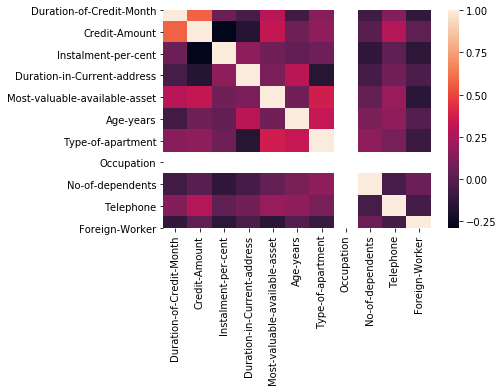

In [123]:
sns.heatmap(correl)

In [124]:
df.isnull().sum()

Credit-Application-Result              0
Account-Balance                        0
Duration-of-Credit-Month               0
Payment-Status-of-Previous-Credit      0
Purpose                                0
Credit-Amount                          0
Value-Savings-Stocks                   0
Length-of-current-employment           0
Instalment-per-cent                    0
Guarantors                             0
Duration-in-Current-address          344
Most-valuable-available-asset          0
Age-years                             12
Concurrent-Credits                     0
Type-of-apartment                      0
No-of-Credits-at-this-Bank             0
Occupation                             0
No-of-dependents                       0
Telephone                              0
Foreign-Worker                         0
dtype: int64

In [125]:
df=df.drop(['Duration-in-Current-address'],1)
df['Age-years']=df['Age-years'].fillna(df['Age-years'].median())
df.head(3)

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4.0,Paid Up,Other,1494.0,£100-£1000,< 1yr,1.0,None,1.0,33.0,Other Banks/Depts,2.0,1,1.0,2.0,1.0,2.0
1,Creditworthy,Some Balance,4.0,Paid Up,Home Related,1494.0,£100-£1000,< 1yr,1.0,None,1.0,29.0,Other Banks/Depts,2.0,1,1.0,2.0,1.0,2.0
2,Creditworthy,Some Balance,4.0,No Problems (in this bank),Home Related,1544.0,None,1-4 yrs,2.0,None,1.0,42.0,Other Banks/Depts,2.0,More than 1,1.0,2.0,1.0,1.0


In [126]:
df.var()

Duration-of-Credit-Month         1.514726e+02
Credit-Amount                    8.016752e+06
Instalment-per-cent              1.240381e+00
Most-valuable-available-asset    1.132665e+00
Age-years                        1.292671e+02
Type-of-apartment                2.913988e-01
Occupation                       0.000000e+00
No-of-dependents                 1.249339e-01
Telephone                        2.404810e-01
Foreign-Worker                   3.662926e-02
dtype: float64

In [127]:
df['Purpose']=df['Purpose'].astype("category")
df['Purpose']=df['Purpose'].cat.codes

The Columns: Occupation, No. of Dependents, Telephone and Foreign Worker have very low variance and would affect the productivity of prediciton, so those columns have to be dropped

In [128]:
df

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4.0,Paid Up,2,1494.0,£100-£1000,< 1yr,1.0,None,1.0,33.0,Other Banks/Depts,2.0,1,1.0,2.0,1.0,2.0
1,Creditworthy,Some Balance,4.0,Paid Up,0,1494.0,£100-£1000,< 1yr,1.0,None,1.0,29.0,Other Banks/Depts,2.0,1,1.0,2.0,1.0,2.0
2,Creditworthy,Some Balance,4.0,No Problems (in this bank),0,1544.0,None,1-4 yrs,2.0,None,1.0,42.0,Other Banks/Depts,2.0,More than 1,1.0,2.0,1.0,1.0
3,Creditworthy,Some Balance,4.0,No Problems (in this bank),0,3380.0,None,1-4 yrs,1.0,None,1.0,37.0,Other Banks/Depts,2.0,1,1.0,2.0,1.0,1.0
4,Creditworthy,No Account,6.0,Paid Up,0,343.0,None,< 1yr,4.0,None,1.0,27.0,Other Banks/Depts,2.0,1,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Creditworthy,No Account,60.0,No Problems (in this bank),2,7418.0,£100-£1000,< 1yr,1.0,None,1.0,33.0,Other Banks/Depts,2.0,1,1.0,1.0,1.0,1.0
496,Creditworthy,No Account,60.0,No Problems (in this bank),0,7418.0,£100-£1000,< 1yr,1.0,None,1.0,27.0,Other Banks/Depts,2.0,1,1.0,1.0,1.0,1.0
497,Creditworthy,No Account,60.0,No Problems (in this bank),0,9157.0,£100-£1000,< 1yr,2.0,None,4.0,27.0,Other Banks/Depts,3.0,1,1.0,1.0,1.0,1.0
498,Creditworthy,Some Balance,60.0,No Problems (in this bank),0,13756.0,£100-£1000,4-7 yrs,2.0,None,4.0,63.0,Other Banks/Depts,3.0,1,1.0,1.0,2.0,1.0


The Columns with Low Variability are: Guarantors, Concurrent-Credits, No of dependents, Occupation, Foreign Worker

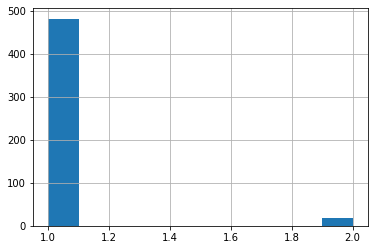

In [129]:
df['Foreign-Worker'].hist()

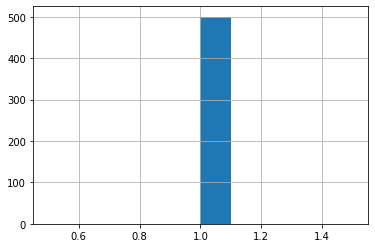

In [130]:
df['Occupation'].hist()

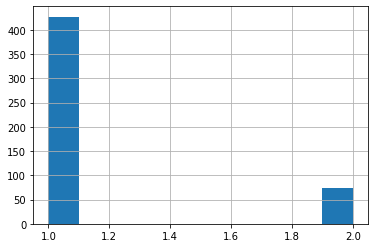

In [131]:
df['No-of-dependents'].hist()

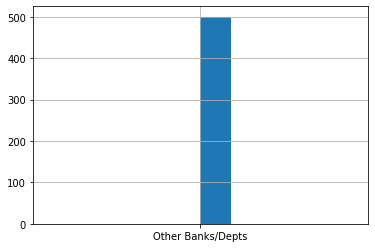

In [132]:
df['Concurrent-Credits'].hist()

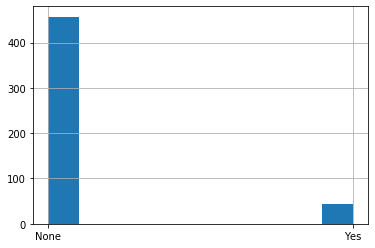

In [133]:
df['Guarantors'].hist()

In [134]:
df=df.drop(['Guarantors','Concurrent-Credits','No-of-dependents','Occupation','Foreign-Worker'], axis=1)

The Telephone Variable is not needed for the Predictive Analysis of this classification Model, so, the column will be removed.

In [135]:
df=df.drop(['Telephone'],axis=1)

In [136]:
df.shape

(500, 13)

In [137]:
df['Age-years'].mean()

35.574

In [138]:
df.dtypes

Credit-Application-Result             object
Account-Balance                       object
Duration-of-Credit-Month             float64
Payment-Status-of-Previous-Credit     object
Purpose                                 int8
Credit-Amount                        float64
Value-Savings-Stocks                  object
Length-of-current-employment          object
Instalment-per-cent                  float64
Most-valuable-available-asset        float64
Age-years                            float64
Type-of-apartment                    float64
No-of-Credits-at-this-Bank            object
dtype: object

In [139]:
df['Credit-Application-Result']=df['Credit-Application-Result'].replace({"Creditworthy":1,"Non-Creditworthy":2})

In [140]:
df['Credit-Application-Result'].value_counts()

1    358
2    142
Name: Credit-Application-Result, dtype: int64

In [141]:
df=pd.get_dummies(data=df, columns=['Account-Balance','Payment-Status-of-Previous-Credit','Value-Savings-Stocks','Length-of-current-employment','No-of-Credits-at-this-Bank'])

In [142]:
df.head()

,Credit-Application-Result,Duration-of-Credit-Month,Purpose,Credit-Amount,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,Account-Balance_No Account,Account-Balance_Some Balance,...,Payment-Status-of-Previous-Credit_Paid Up,Payment-Status-of-Previous-Credit_Some Problems,Value-Savings-Stocks_< £100,Value-Savings-Stocks_None,Value-Savings-Stocks_£100-£1000,Length-of-current-employment_1-4 yrs,Length-of-current-employment_4-7 yrs,Length-of-current-employment_< 1yr,No-of-Credits-at-this-Bank_1,No-of-Credits-at-this-Bank_More than 1
0,1,4.0,2,1494.0,1.0,1.0,33.0,2.0,0,1,...,1,0,0,0,1,0,0,1,1,0
1,1,4.0,0,1494.0,1.0,1.0,29.0,2.0,0,1,...,1,0,0,0,1,0,0,1,1,0
2,1,4.0,0,1544.0,2.0,1.0,42.0,2.0,0,1,...,0,0,0,1,0,1,0,0,0,1
3,1,4.0,0,3380.0,1.0,1.0,37.0,2.0,0,1,...,0,0,0,1,0,1,0,0,1,0
4,1,6.0,0,343.0,4.0,1.0,27.0,2.0,1,0,...,1,0,0,1,0,0,0,1,1,0


#### Trainng the Data

In [143]:
X=df.drop(['Credit-Application-Result'],axis=1)
y=df['Credit-Application-Result']

In [144]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

#### Modelling and Validation

In [145]:
LogReg=LogisticRegression()
LogReg.fit(X_train,y_train)

C:\Users\USER\Anaconda3new\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [146]:
data=(pd.DataFrame(LogReg.coef_).T)
data.columns=['Feature_Importance']
data['Features']=X.columns
data.sort_values(by=['Feature_Importance'],inplace=True, ascending=False)
data

,Feature_Importance,Features
11,0.455159,Payment-Status-of-Previous-Credit_Some Problems
7,0.369986,Account-Balance_No Account
13,0.292450,Value-Savings-Stocks_None
17,0.234103,Length-of-current-employment_< 1yr
4,0.129206,Most-valuable-available-asset
3,0.014430,Instalment-per-cent
0,0.012577,Duration-of-Credit-Month
2,0.000103,Credit-Amount
5,-0.020098,Age-years
16,-0.127113,Length-of-current-employment_4-7 yrs


The Training dataset accuracy is:  0.7914285714285715
The Overall Accuracy is:  0.7666666666666667


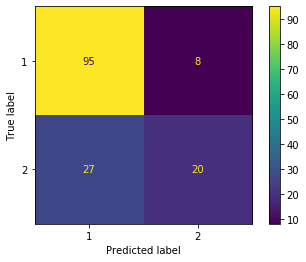

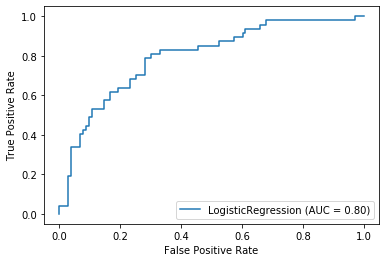

In [147]:
print ("The Training dataset accuracy is: ", LogReg.score(X_train, y_train))
print ('The Overall Accuracy is: ',LogReg.score(X_test,y_test))
plot_confusion_matrix(LogReg,X_test, y_test)
metrics.plot_roc_curve(LogReg, X_test, y_test)  

In [148]:
DecisionTree=DecisionTreeClassifier()
DecisionTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [149]:
DecisionTree.feature_importances_
data2=pd.DataFrame()
data2['Features']=X.columns
data2['Feature_Importance']=pd.DataFrame(DecisionTree.feature_importances_)
data2.sort_values(by=['Feature_Importance'],inplace=True, ascending=False)
data2

,Features,Feature_Importance
2,Credit-Amount,0.241408
5,Age-years,0.189988
0,Duration-of-Credit-Month,0.156952
3,Instalment-per-cent,0.068569
8,Account-Balance_Some Balance,0.065773
16,Length-of-current-employment_4-7 yrs,0.064433
11,Payment-Status-of-Previous-Credit_Some Problems,0.049652
1,Purpose,0.032598
10,Payment-Status-of-Previous-Credit_Paid Up,0.027268
4,Most-valuable-available-asset,0.027151


The Training dataset accuracy is:  1.0
The Overall Accuracy is:  0.6466666666666666


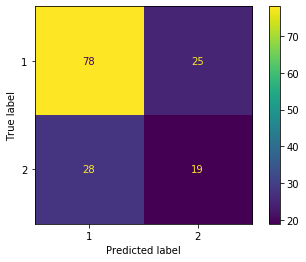

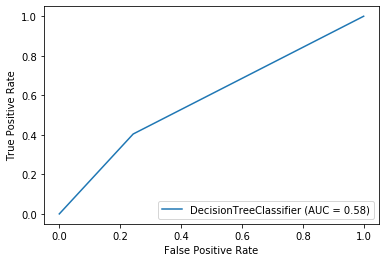

In [150]:
print ("The Training dataset accuracy is: ", DecisionTree.score(X_train, y_train))
print ('The Overall Accuracy is: ',DecisionTree.score(X_test,y_test))
plot_confusion_matrix(DecisionTree,X_test, y_test)
metrics.plot_roc_curve(DecisionTree, X_test, y_test)  

From the accuracy given above, it the decision tree prediction is biased as the accuracy of the training set is 100% while that of the testing set is 68.6 percent. The testing set tends to be underfitted

In [151]:
Forest=RandomForestClassifier()
Forest.fit(X_train,y_train)

RandomForestClassifier()

In [152]:
Forest.feature_importances_
data3=pd.DataFrame()
data3['Features']=X.columns
data3['Feature_Importance']=pd.DataFrame(Forest.feature_importances_)
data3.sort_values(by=['Feature_Importance'],inplace=True, ascending=False)
data3

,Features,Feature_Importance
2,Credit-Amount,0.217926
0,Duration-of-Credit-Month,0.143083
5,Age-years,0.136532
4,Most-valuable-available-asset,0.064722
3,Instalment-per-cent,0.056323
1,Purpose,0.037635
6,Type-of-apartment,0.036876
11,Payment-Status-of-Previous-Credit_Some Problems,0.036415
7,Account-Balance_No Account,0.034823
8,Account-Balance_Some Balance,0.032253


The Training set Accuracy is:  1.0
The Overall Accuracy is:  0.76


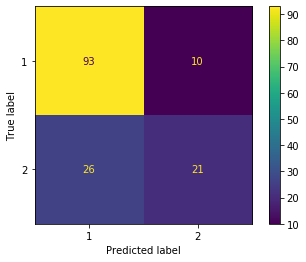

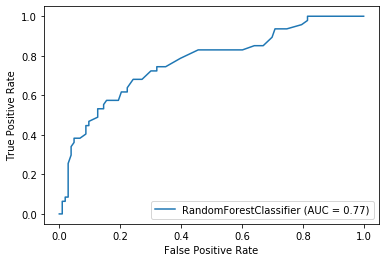

In [153]:
print ("The Training set Accuracy is: ", Forest.score(X_train,y_train))
print ('The Overall Accuracy is: ',Forest.score(X_test,y_test))
plot_confusion_matrix(Forest,X_test, y_test)
metrics.plot_roc_curve(Forest, X_test, y_test)  

In [154]:
Boosted=GradientBoostingClassifier()
Boosted.fit(X_train,y_train)

GradientBoostingClassifier()

In [155]:
Boosted.feature_importances_
data4=pd.DataFrame()
data4['Features']=X.columns
data4['Feature_Importance']=pd.DataFrame(Boosted.feature_importances_)
data4.sort_values(by=['Feature_Importance'],inplace=True, ascending=False)
data4

,Features,Feature_Importance
2,Credit-Amount,0.301197
0,Duration-of-Credit-Month,0.191373
5,Age-years,0.140331
11,Payment-Status-of-Previous-Credit_Some Problems,0.076308
8,Account-Balance_Some Balance,0.047142
3,Instalment-per-cent,0.037371
4,Most-valuable-available-asset,0.035174
13,Value-Savings-Stocks_None,0.034723
7,Account-Balance_No Account,0.034160
17,Length-of-current-employment_< 1yr,0.029288


The Training set Accuracy is:  0.9457142857142857
The Overall Accuracy is:  0.7133333333333334


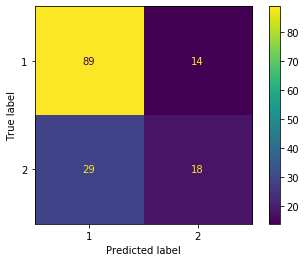

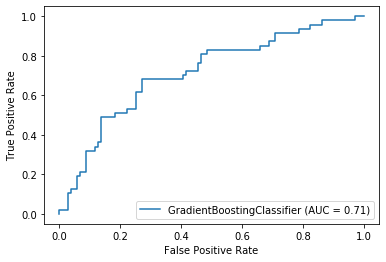

In [156]:
print ("The Training set Accuracy is: ", Boosted.score(X_train,y_train))
print ('The Overall Accuracy is: ',Boosted.score(X_test,y_test))
plot_confusion_matrix(Boosted,X_test, y_test)
metrics.plot_roc_curve(Boosted, X_test, y_test)  

In [157]:
test=pd.read_excel("customers-to-score.xlsx")

In [158]:
test = test.astype({"Occupation":"float","No-of-dependents":"float","Telephone":"float","Foreign-Worker":"float","Type-of-apartment":"float","Most-valuable-available-asset":"float","Instalment-per-cent":'float',"Duration-of-Credit-Month":'float',"Credit-Amount":"float"})

In [159]:
test.head()

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,No Account,9.0,No Problems (in this bank),Home Related,2799.0,None,< 1yr,2.0,None,2,1.0,36,Other Banks/Depts,1.0,More than 1,1.0,2.0,1.0,1.0
1,No Account,12.0,No Problems (in this bank),Home Related,2122.0,None,< 1yr,3.0,None,2,1.0,39,Other Banks/Depts,1.0,More than 1,1.0,2.0,1.0,2.0
2,No Account,24.0,Paid Up,Home Related,3758.0,£100-£1000,< 1yr,1.0,None,4,4.0,23,Other Banks/Depts,1.0,1,1.0,1.0,1.0,1.0
3,No Account,11.0,No Problems (in this bank),Home Related,3905.0,None,< 1yr,2.0,None,2,1.0,36,Other Banks/Depts,1.0,More than 1,1.0,2.0,1.0,1.0
4,No Account,6.0,No Problems (in this bank),Home Related,1957.0,None,1-4 yrs,1.0,None,4,3.0,31,Other Banks/Depts,2.0,1,1.0,1.0,1.0,1.0


In [160]:
test=test.drop(['Duration-in-Current-address'],1)
test['Age-years']=test['Age-years'].fillna(test['Age-years'].median())
test=test.drop(['Guarantors','Concurrent-Credits','No-of-dependents','Occupation','Foreign-Worker'], axis=1)
test=test.drop(['Telephone'],axis=1)
test.head(3)

,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank
0,No Account,9.0,No Problems (in this bank),Home Related,2799.0,None,< 1yr,2.0,1.0,36,1.0,More than 1
1,No Account,12.0,No Problems (in this bank),Home Related,2122.0,None,< 1yr,3.0,1.0,39,1.0,More than 1
2,No Account,24.0,Paid Up,Home Related,3758.0,£100-£1000,< 1yr,1.0,4.0,23,1.0,1


In [161]:
test['Purpose']=test['Purpose'].astype("category")
test['Purpose']=test['Purpose'].cat.codes

In [162]:
test=pd.get_dummies(data=test, columns=['Account-Balance','Payment-Status-of-Previous-Credit','Value-Savings-Stocks','Length-of-current-employment','No-of-Credits-at-this-Bank'])

In [163]:
X_prediction=test.values

In [164]:
LogRegPredict=LogReg.predict(X_prediction)

In [165]:
condition1=LogRegPredict==1
condition2=LogRegPredict==2
print ("Logistic Regression Prediction: \n")
print ("The Number of Credit Worthy is: ",condition1.sum() )
print ("The Number of Non-Credit Worthy is: ",condition2.sum() )

Logistic Regression Prediction: 

The Number of Credit Worthy is:  416
The Number of Non-Credit Worthy is:  84


In [166]:
DecisionTreePredict=DecisionTree.predict(X_prediction)

In [167]:
condition1=DecisionTreePredict==1
condition2=DecisionTreePredict==2
print ("Logistic Regression Prediction: \n")
print ("The Number of Credit Worthy is: ",condition1.sum() )
print ("The Number of Non-Credit Worthy is: ",condition2.sum() )

Logistic Regression Prediction: 

The Number of Credit Worthy is:  358
The Number of Non-Credit Worthy is:  142


In [168]:
ForestPredict=Forest.predict(X_prediction)

In [169]:
condition1=ForestPredict==1
condition2=ForestPredict==2
print ("Logistic Regression Prediction: \n")
print ("The Number of Credit Worthy is: ",condition1.sum() )
print ("The Number of Non-Credit Worthy is: ",condition2.sum() )

Logistic Regression Prediction: 

The Number of Credit Worthy is:  420
The Number of Non-Credit Worthy is:  80


In [170]:
BoostedPredict=Boosted.predict(X_prediction)

In [171]:
condition1=BoostedPredict==1
condition2=BoostedPredict==2
print ("Logistic Regression Prediction: \n")
print ("The Number of Credit Worthy is: ",condition1.sum() )
print ("The Number of Non-Credit Worthy is: ",condition2.sum() )

Logistic Regression Prediction: 

The Number of Credit Worthy is:  400
The Number of Non-Credit Worthy is:  100
